In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import numpy as np

import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter

In [157]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255], #JPMGreen
        [224 / 255, 120 / 255, 57 / 255], #Orange
        [205 / 255, 51 / 255, 60 / 255], #Red
        [0 / 255, 162 / 255, 88 / 255], #Green
        [51 / 255, 103 / 255, 171 / 255], #Blue
])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
# SAVEFIG_KWARGS = {'dpi': 72*4}
# SAVEFIG_KWARGS = {'dpi': 1200}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'
# x_min = datetime(2020,2,15)
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}


footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"

def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes



In [ ]:


def _initialize_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')

    prefs = {
        "profile.default_content_settings.popups": 0,
        "download.prompt_for_download": False,
#         "download.default_directory": DATADIR,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
        'extensions.disabled': True,
    }
    options.add_experimental_option("prefs", prefs)
    driver_loc = os.path.join(os.getcwd(),"chromedriver")
    while True:
        try:
            driver = webdriver.Chrome(driver_loc, chrome_options=options)
            break
        except:
            pass
    return driver
    


In [ ]:
driver = _initialize_driver()

In [ ]:
total=[]
day_links=[]
for month in range(1,7):
    link = "https://timesofindia.indiatimes.com/archive/year-2020,month-"+str(month)+".cms"
    driver.get(link)
    soup = BeautifulSoup(driver.page_source,"lxml")
    for a in soup.find_all('a', href=True):
        if "archivelist" in a['href']:
            day_link = a['href']
#             print(day_link)
            if day_link not in day_links:
                date = int(day_link.split("archivelist")[0].split("/")[3])
#                 print("Month :"+str(month))
#                 print("Date :"+str(date))
                day_links.append("https://timesofindia.indiatimes.com"+day_link)
                driver.get("https://timesofindia.indiatimes.com"+day_link)
                col_xpaths = [
                    "/html/body/div[1]/table[2]/tbody/tr[2]/td[1]/div[3]/table/tbody/tr[2]/td[1]",
                    "/html/body/div[1]/table[2]/tbody/tr[2]/td[1]/div[3]/table/tbody/tr[2]/td[3]"
                ]
                for xpath in col_xpaths:
                    col = WebDriverWait(driver, 5).until(
                        EC.presence_of_element_located((By.XPATH, xpath)))
                    soup = BeautifulSoup(col.get_attribute('innerHTML'),"lxml")
                    for a in soup.find_all('a', href=True):
                        article_link = a['href']
                        article_text = a.text
                        total.append([month,date,2020,article_link,article_text])



In [ ]:
df = pd.DataFrame.from_records(total)

In [ ]:
df.columns = ['month','day','year','article_link','headline']

In [ ]:
df['date']=pd.to_datetime(df['day'].astype(str)+df['month'].astype(str)+df['year'].astype(str),format='%d%m%Y')

In [ ]:
df = df [['date','headline','article_link']]

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.to_pickle("TOI_news.pkl")

In [3]:
df = pd.read_pickle("TOI_news.pkl")

In [4]:
# df

In [5]:
stopwords = set(STOPWORDS)
comment_words= ""

In [5]:
import spacy

In [8]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(u"Apple is opening its first big office in San Francisco and California.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Apple', 'ORG'), ('first', 'ORDINAL'), ('San Francisco', 'GPE'), ('California', 'GPE')]


In [9]:
def spacy_entity(df):    
    df1 = nlp(df)
    for w in df1.ents:
        if w.label_ == "GPE":
            df2 = [[w.text,w.label_] for w in df1.ents]
    return df2



In [10]:
df['entities'] = df['headline'].apply(spacy_entity)
df.to_pickle("TOI_news.pkl")

In [42]:
df


,date,headline,article_link,entities
0,2020-01-01,Allergy cases on the rise in Bengaluru,http://timesofindia.indiatimes.com//life-style...,[]
1,2020-01-01,Shivin Narang injures his hand on the set of h...,http://timesofindia.indiatimes.com//tv/news/hi...,"[[Narang, GPE]]"
2,2020-01-01,A grand Hanukkah celebration held in the city,http://timesofindia.indiatimes.com//city/benga...,[]
3,2020-01-01,"I respect my competitors, because they bring o...",http://timesofindia.indiatimes.com//entertainm...,[]
4,2020-01-01,Strong New Year resolutions keep young minds m...,http://timesofindia.indiatimes.com//life-style...,"[[New Year, EVENT]]"
...,...,...,...,...
96995,2020-06-24,"Goons kill drinking partner, 12th murder regis...",/city/nagpur/goons-kill-drinking-partner-12th-...,"[[12th, DATE], [this month, DATE]]"
96996,2020-06-24,Irrfan Khan's son Babil shares a beautiful pos...,/entertainment/hindi/bollywood/news/irrfan-kha...,"[[Irrfan Khan's, PERSON], [Babil, ORG], [SSR, ..."
96997,2020-06-24,"City police check 11,823 goons in 18 days",/city/nagpur/city-police-check-11823-goons-in-...,"[[11,823, CARDINAL], [18 days, DATE]]"
96998,2020-06-24,Vande Bharat flight brings 10 stranded in Dubai,/city/nagpur/vande-bharat-flight-brings-10-str...,"[[10, CARDINAL], [Dubai, GPE]]"


In [7]:
entitites = df.entities.to_list()

In [37]:
d = {}

In [41]:
all_type_ent = []
for item in (entitites)[:100]:
    for ent in (item):
        if ent[1] not in all_type_ent:
            all_type_ent.append(ent[1])

In [32]:
all_type_ent = []
for item in (entitites)[:100]:
    for ent in (item):
        try:
            if len(d[ent[1]]) == 0:
                d[ent[1]] =  [ent[0]]
            else:
                d[ent[1]] =  d[ent[1]].append(ent[0])
        except:
            pass

In [42]:
for a in all_type_ent:
    d[a] = []

In [63]:
for value in df.headline:
    comment_words = comment_words + value
#     print(value)

In [55]:
for item in (entitites)[:10]:
    if len(item) > 0:
        for ent in item:
            print(ent)

['Narang', 'GPE']
['New Year', 'EVENT']
['Bhuvann Ponnannaa', 'ORG']
['Hiphop Adhi', 'PERSON']
['Bindhumalini', 'GPE']
['Bhuvann Ponnannaa', 'ORG']


In [56]:
d={}

In [58]:
for item in (entitites):
    if len(item) > 0:
        for ent in item:
            if ent[1] not in list(d.keys()):
                d[ent[1]] = [ent[0]]
            else:
                d[ent[1]].append(ent[0]) 

In [60]:
d.keys()

dict_keys(['GPE', 'EVENT', 'ORG', 'PERSON', 'ORDINAL', 'DATE', 'TIME', 'CARDINAL', 'WORK_OF_ART', 'PRODUCT', 'PERCENT', 'MONEY', 'NORP', 'LANGUAGE', 'QUANTITY', 'LOC', 'LAW', 'FAC'])

In [71]:
locations = {}
locations['GPE'] = d['GPE']
df_l = pd.DataFrame(locations)
df_l = df_l.apply(pd.Series.value_counts, axis=0).head(50)

In [91]:
from pandas import ExcelWriter
def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n)
        writer.save()

In [92]:
dfs=[]
for item in ['GPE','ORG','PERSON','NORP','LOC']:
    locations = {}
    locations['GPE'] = d[item]
    df_l = pd.DataFrame(locations)
    df_l = df_l.apply(pd.Series.value_counts, axis=0).head(100)
    dfs.append(df_l)
save_xls(dfs,"df.xlsx")

In [263]:
df1 = pd.read_excel("df.xlsx",sheet_name="sheet0")
df1.columns = ['location','num']
df1 = df1.groupby(['location'])[['num']].sum()
df1 = df1.sort_values(by='num',ascending= False)
df1 = df1.head(15)
df1 = df1.reset_index()
df1
words = df1['location'].to_list()
word_values= df1['num'].to_list()

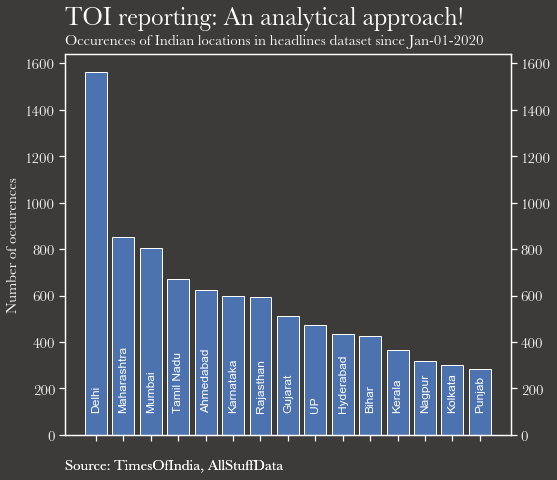

In [264]:
footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels([], rotation='vertical')
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
fig.text(0.125,0.9,"Occurences of Indian locations in headlines dataset since Jan-01-2020",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())

rects = ax.patches
labels = [words[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, 100 , label,
            ha='center', va='bottom',rotation='vertical')


mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_10.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

In [417]:
df1 = pd.read_excel("df.xlsx",sheet_name="Sheet5")
df1.columns = ['location','num']
df1 = df1.groupby(['location'])[['num']].sum()
df1 = df1.sort_values(by='num',ascending= False)
df1 = df1.head(15)
df1 = df1.reset_index()
df1
words = df1['location'].to_list()
word_values= df1['num'].to_list()

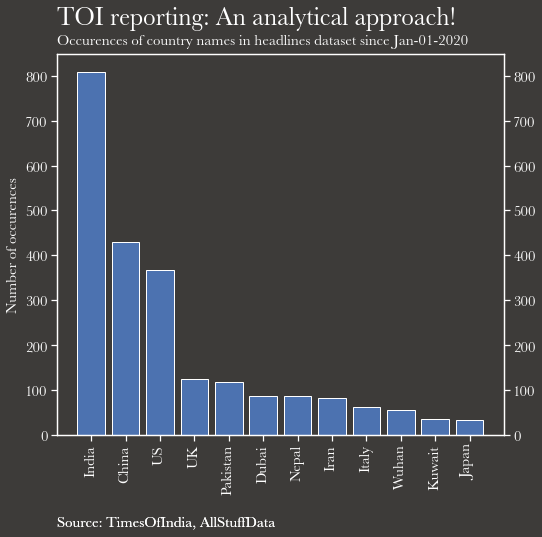

In [262]:
footnote_params = {
    'xy': (0,-0.15),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
fig.text(0.125,0.9,"Occurences of country names in headlines dataset since Jan-01-2020",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())


mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_11.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

{'Delhi': 1561,
 'Maharashtra': 854,
 'Mumbai': 806,
 'Tamil Nadu': 669,
 'Ahmedabad': 625,
 'Karnataka': 597,
 'Rajasthan': 594,
 'Gujarat': 511,
 'UP': 475,
 'Hyderabad': 435,
 'Bihar': 425,
 'Kerala': 366,
 'Nagpur': 316,
 'Kolkata': 302,
 'Punjab': 282}

In [421]:

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    
])

In [422]:
from colour import Color
colormap_list = colormap.tolist()

In [423]:
def grey_color_func(word, font_size, position,orientation,\
                    random_state=None, **kwargs):
    return(color_dict[word])

In [408]:
df1 = pd.read_excel("df.xlsx",sheet_name="sheet0")
df1.columns = ['location','num']
df1 = df1.groupby(['location'])[['num']].sum()
df1 = df1.sort_values(by='num',ascending= False)
df1 = df1.head(20)
df1 = df1.reset_index()
df1
words = df1['location'].to_list()
word_values= df1['num'].to_list()

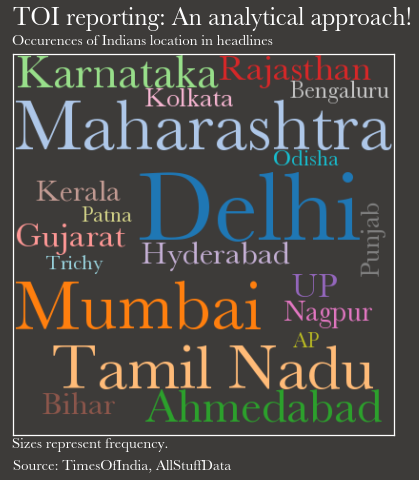

In [409]:
df1= df1.set_index('location')
d = df1.to_dict(orient="dict")
d = d['num']
color_dict={}
for i,a in enumerate(list(d.keys())):
    color_dict[a] = colormap_list[i]
color_dict

from wordcloud import WordCloud
wc = WordCloud(font_path="Baskerville",height=400,
               background_color="#3D3B39",\
               colormap=plt.cm.Spectral)
wc.generate_from_frequencies(d)
wc.recolor(color_func = grey_color_func)

footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', \
                       'fontname':'Baskerville'}, pad=30 )
fig.text(0.18,0.9,"Occurences of Indians location in headlines",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
fig.text(0.18,0.1,"Sizes represent frequency.",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

plt.imshow(wc, interpolation="bilinear")
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
apply_to_axes((ax,ax1),footnote_text = footnote_text)

f = os.path.dirname(os.getcwd())+'/todays_chart/new_12.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

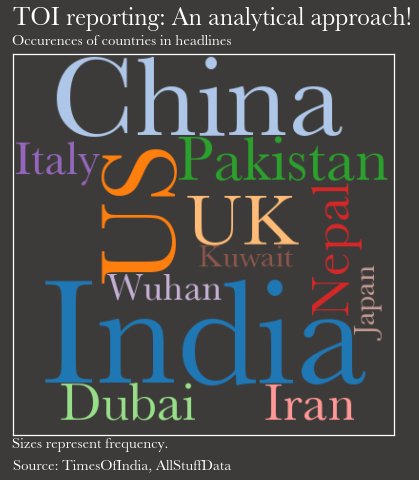

In [418]:
df1= df1.set_index('location')
d = df1.to_dict(orient="dict")
d = d['num']
color_dict={}
for i,a in enumerate(list(d.keys())):
    color_dict[a] = colormap_list[i]
color_dict

from wordcloud import WordCloud
wc = WordCloud(font_path="Baskerville",height=400,
               background_color="#3D3B39",\
               colormap=plt.cm.Spectral)
wc.generate_from_frequencies(d)
wc.recolor(color_func = grey_color_func)

footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', \
                       'fontname':'Baskerville'}, pad=30 )
fig.text(0.18,0.9,"Occurences of countries in headlines",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
fig.text(0.18,0.1,"Sizes represent frequency.",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

plt.imshow(wc, interpolation="bilinear")
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
apply_to_axes((ax,ax1),footnote_text = footnote_text)

f = os.path.dirname(os.getcwd())+'/todays_chart/new_13.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

In [419]:
df1 = pd.read_excel("df.xlsx",sheet_name="sheet1")
df1.columns = ['location','num']
df1 = df1.groupby(['location'])[['num']].sum()
df1 = df1.sort_values(by='num',ascending= False)
# df1 = df1.head(20)
df1 = df1.reset_index()
df1
words = df1['location'].to_list()
word_values= df1['num'].to_list()

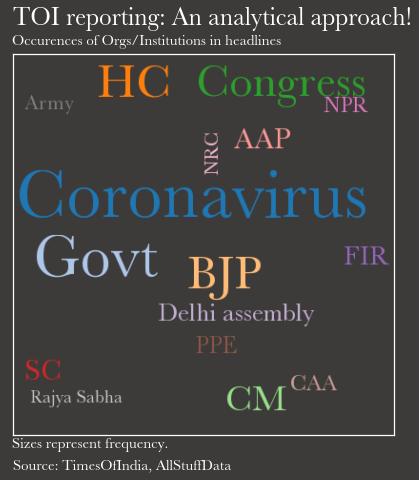

In [420]:
df1= df1.set_index('location')
d = df1.to_dict(orient="dict")
d = d['num']
color_dict={}
for i,a in enumerate(list(d.keys())):
    color_dict[a] = colormap_list[i]
color_dict

from wordcloud import WordCloud
wc = WordCloud(font_path="Baskerville",height=400,
               background_color="#3D3B39",\
               colormap=plt.cm.Spectral)
wc.generate_from_frequencies(d)
wc.recolor(color_func = grey_color_func)

footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', \
                       'fontname':'Baskerville'}, pad=30 )
fig.text(0.18,0.9,"Occurences of Orgs/Institutions in headlines",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
fig.text(0.18,0.1,"Sizes represent frequency.",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

plt.imshow(wc, interpolation="bilinear")
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
apply_to_axes((ax,ax1),footnote_text = footnote_text)

f = os.path.dirname(os.getcwd())+'/todays_chart/new_14.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

In [428]:
df1 = pd.read_excel("df.xlsx",sheet_name="sheet2")
df1.columns = ['location','num']
df1 = df1.groupby(['location'])[['num']].sum()
df1 = df1.sort_values(by='num',ascending= False)
# df1 = df1.head(20)
df1 = df1.reset_index()
words = df1['location'].to_list()
word_values= df1['num'].to_list()

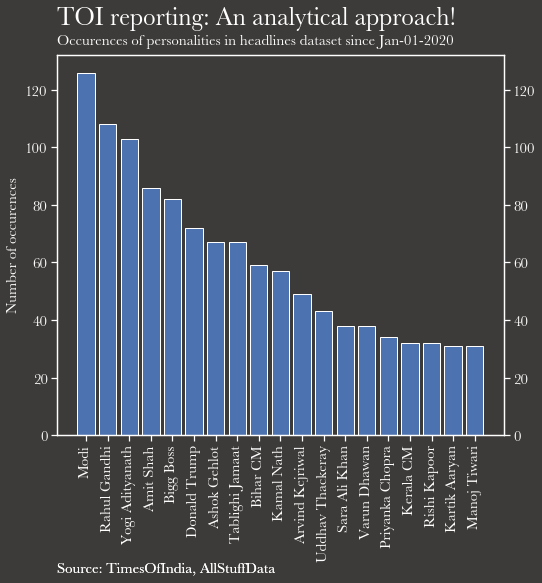

In [432]:
footnote_params = {
    'xy': (0,-0.27),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
fig.text(0.125,0.9,"Occurences of personalities in headlines dataset since Jan-01-2020",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())


mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_16.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

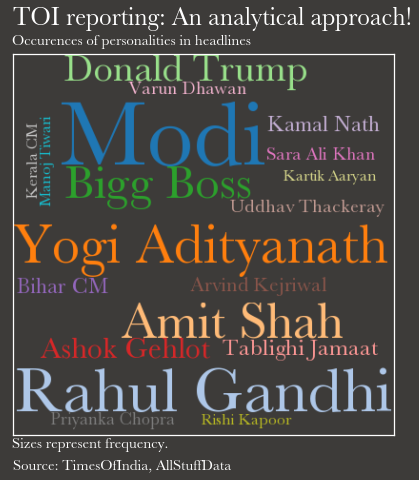

In [433]:
df1= df1.set_index('location')
d = df1.to_dict(orient="dict")
d = d['num']
color_dict={}
for i,a in enumerate(list(d.keys())):
    color_dict[a] = colormap_list[i]
color_dict

from wordcloud import WordCloud
wc = WordCloud(font_path="Baskerville",height=400,
               background_color="#3D3B39",\
               colormap=plt.cm.Spectral)
wc.generate_from_frequencies(d)
wc.recolor(color_func = grey_color_func)

footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

fig, ax = plt.subplots(figsize=(8,7))
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', \
                       'fontname':'Baskerville'}, pad=30 )
fig.text(0.18,0.9,"Occurences of personalities in headlines",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
fig.text(0.18,0.1,"Sizes represent frequency.",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})

plt.imshow(wc, interpolation="bilinear")
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_xticklabels([])
ax.set_yticklabels([])
apply_to_axes((ax,ax1),footnote_text = footnote_text)

f = os.path.dirname(os.getcwd())+'/todays_chart/new_15.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

In [ ]:
geograpy.get_place_context(text=comment_words)

In [6]:
df = df[['date','headline','article_link']]

In [7]:
df.columns

Index(['date', 'headline', 'article_link'], dtype='object')

In [97]:
reindexed_data = df['headline']
reindexed_data.index = df['date']

In [98]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [35]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

In [37]:
indexes=[]
for i,item in enumerate(words):
    if len(item) < 3:
        words.remove(item)
        indexes.append(i)
        

In [ ]:
indexes=[]
for i,item in enumerate(word_values):
    if len(item) < 3:
        words.remove(item)
        indexes.append(i)

In [163]:
footnote_params = {
    'xy': (0,0),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

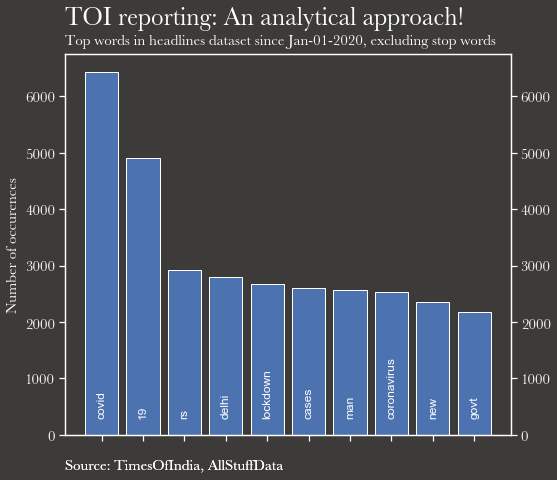

In [168]:
fig, ax = plt.subplots(figsize=(8,7))
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels([], rotation='vertical')
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
# ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
fig.text(0.125,0.9,"Top words in headlines dataset since Jan-01-2020, excluding stop words",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())

rects = ax.patches
labels = [words[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, 300 , label,
            ha='center', va='bottom',rotation='vertical')


mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = False)

In [169]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [170]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  831123
Mean number of words per headline:  9.444579545454545


In [171]:
footnote_params = {
    'xy': (0,-0.08),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

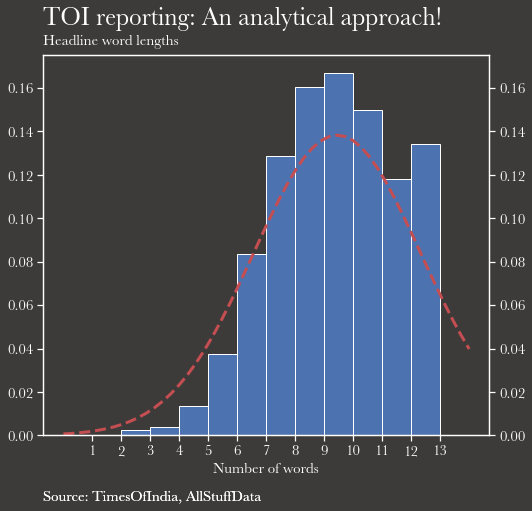

In [174]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(8,7))
ax.hist(word_counts, bins=range(1,14), density=True)
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=3)
ax.set_xticks(range(1,14))
ax.set_xlabel('Number of words')
# plt.show()

ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
fig.text(0.125,0.9,"Headline word lengths",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
# plt.show()

mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f =os.path.dirname(os.getcwd())+'/todays_chart/new_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

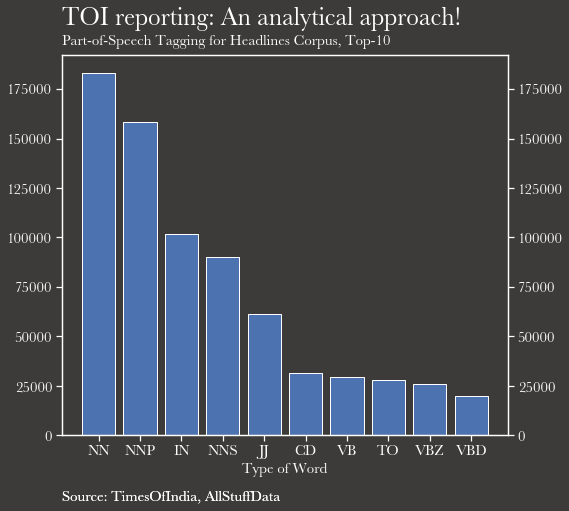

In [177]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

pos_sorted_types = pos_sorted_types[:10]
pos_sorted_counts = pos_sorted_counts[:10]

fig, ax = plt.subplots(figsize=(8,7))
ax.bar(range(len(pos_sorted_counts)), pos_sorted_counts)
ax.set_xticks(range(len(pos_sorted_counts)))
ax.set_xticklabels(pos_sorted_types)
ax.set_xlabel('Type of Word')

ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
fig.text(0.125,0.9,"Part-of-Speech Tagging for Headlines Corpus, Top-10",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
# plt.show()
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))


footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

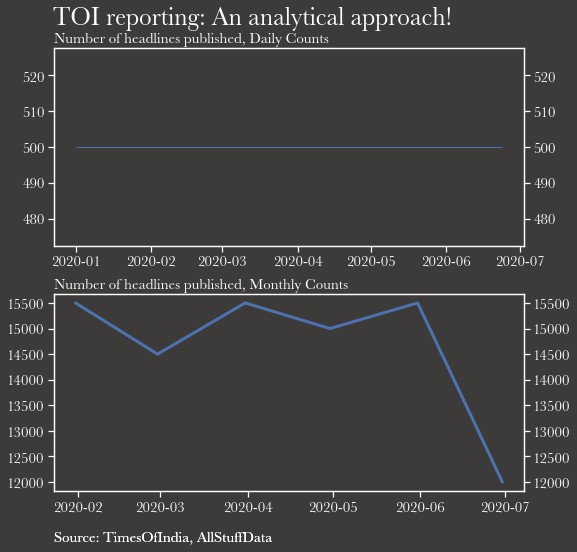

In [181]:
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

# fig, ax = plt.subplots(figsize=(8,7))
fig, ax = plt.subplots(2, figsize=(8,7))
ax[0].plot(daily_counts, linewidth=1)
ax[0].set_title('Number of headlines published, Daily Counts',loc=CHART_TITLE_ALIGN,\
               fontdict={'fontsize':15,'fontweight':'bold', 'fontname':'Baskerville'})
ax[1].plot(monthly_counts, linewidth=3)
ax[1].set_title('Number of headlines published, Monthly Counts',loc=CHART_TITLE_ALIGN,\
               fontdict={'fontsize':15,'fontweight':'bold', 'fontname':'Baskerville'})

# ax[0].set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
#              fontdict={'fontsize':15,'fontweight':'bold', 'fontname':'Baskerville'} )
# ax[0].set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
#              fontdict={'fontsize':15,'fontweight':'bold', 'fontname':'Baskerville'} )
fig.text(0.09,0.99,"TOI reporting: An analytical approach!",\
         fontdict={'fontsize':25,'fontweight':'bold','fontname':'Baskerville'})
ax1 = ax[0].twinx()
ax1.set_ylim(ax[0].get_ylim())
ax2 = ax[1].twinx()
ax2.set_ylim(ax[1].get_ylim())
fig.tight_layout() 
# plt.show()

mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax[0].set_facecolor((61.0/255, 58.5/255, 57.0/255))
ax[1].set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))

footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax[0],ax1),footnote_text = "")
apply_to_axes((ax[1],ax2),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [182]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n{}'.format(small_document_term_matrix[123]))

Headline before vectorization: Fees not an issue, JNU students misled: Ramesh Pokhriyal Nishank
Headline after vectorization: 
  (0, 4696)	1
  (0, 6331)	1
  (0, 6498)	1
  (0, 11993)	1
  (0, 7919)	1
  (0, 9930)	1
  (0, 9305)	1
  (0, 8451)	1


In [183]:
n_topics = 8

In [227]:
#LSA
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [228]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [229]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [230]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [231]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  covid 19 cases patients positive test tests new ve patient
Topic 2:  rs police 000 workers cm lakh pune goa government telangana
Topic 3:  coronavirus lockdown home says day pradesh court high students woman
Topic 4:  old year girl arrested dies killed woman yr murder booked
Topic 5:  new cases day tally positive fresh deaths year sees gets
Topic 6:  delhi elections 2020 assembly new cops arvind kejriwal riots bjp
Topic 7:  man held test positive death woman wife hospital kills dies
Topic 8:  govt tamil nadu hc civic plea road sc seeks polls


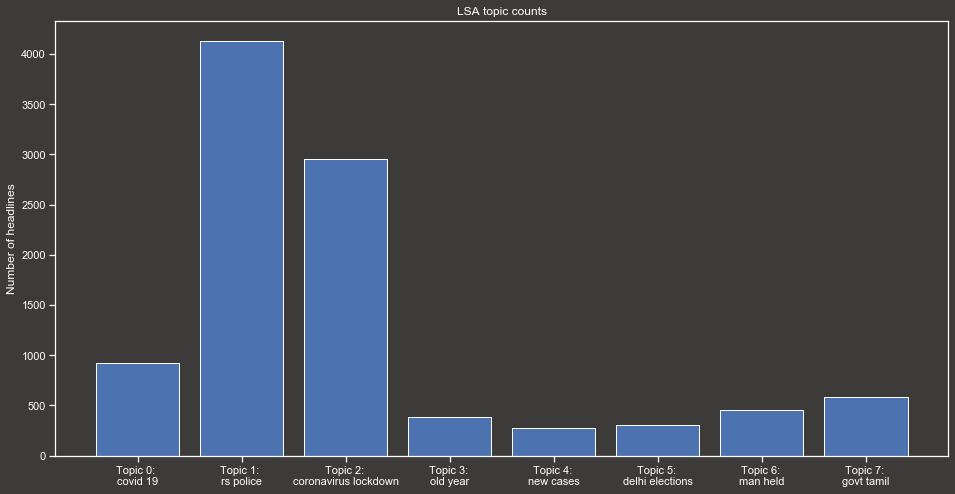

In [232]:
top_3_words = get_top_n_words(2, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [233]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 1.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.007646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.330894
[t-SNE] KL divergence after 2000 iterations: 1.092137


In [234]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [235]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]
import matplotlib.patches as mpatches

In [236]:
footnote_params = {
    'xy': (0,-0.20),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
# SAVEFIG_KWARGS = {'dpi': 1200}
SAVEFIG_KWARGS = {'dpi': 72*4}

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['lines.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

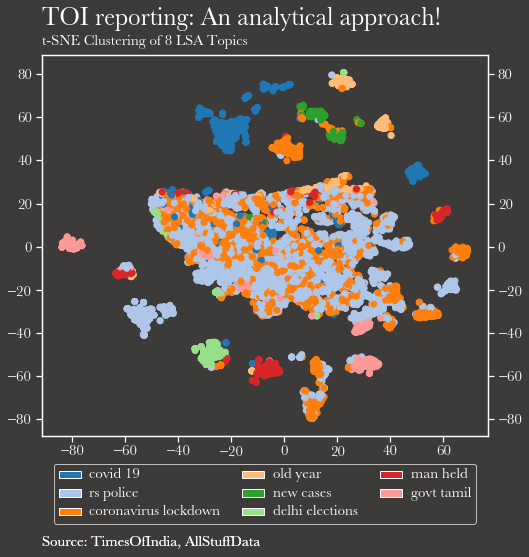

In [237]:
fig, ax = plt.subplots(figsize=(8,7))
top_3_words_lsa = get_top_n_words(2, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

# plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)

scatter = ax.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1],color=colormap[lsa_keys])


# for i in range(n_topics):
#     ax.text(lsa_mean_topic_vectors[i][0], lsa_mean_topic_vectors[i][1],top_3_words_lsa[i], fontdict={'fontsize':20,'fontweight':'bold','fontname':'Baskerville'}) 

recs = []
for i in range(0,len(colormap.tolist())):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colormap[i]))
ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
fig.text(0.125,0.9,"t-SNE Clustering of 8 LSA Topics",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))
ax.legend(recs,top_3_words_lsa,**LEGEND_KWARGS,**legend_placement_kwargs,facecolor =(61.0/255, 58.5/255, 57.0/255))
footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_06.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [1]:
recs

NameError: name 'recs' is not defined

In [ ]:
#LDA

In [329]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [330]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [331]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  lockdown people exams hit work food traffic new pradesh board
Topic 2:  delhi day gets caa state rajasthan city goa covid cases
Topic 3:  covid 19 cases new govt days cm tamil nadu cops
Topic 4:  rs home workers pradesh crore 000 students andhra today online
Topic 5:  year old held hc high court tamil man nadu telangana
Topic 6:  covid cases delhi patients road govt 19 arrested kerala case
Topic 7:  positive test woman covid 19 coronavirus says india man police
Topic 8:  coronavirus man pune rs booked lakh hyderabad mumbai gujarat dies


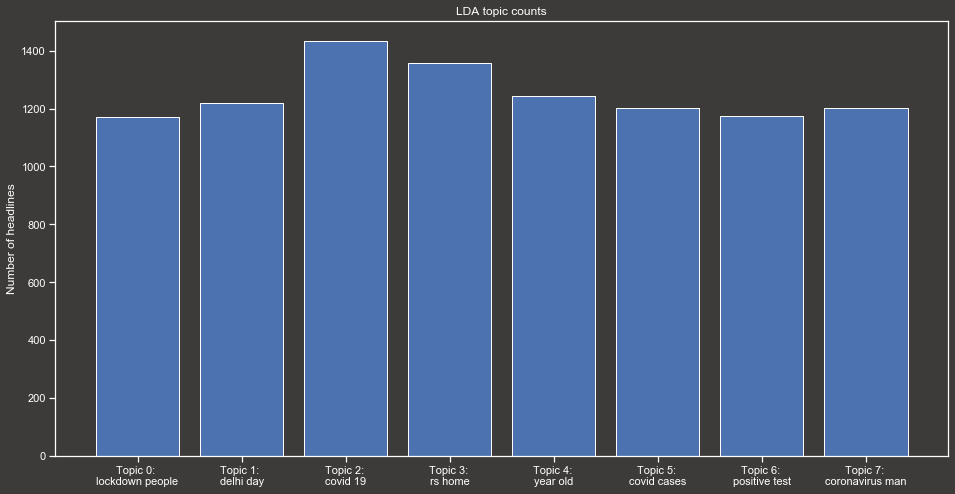

In [332]:
top_3_words = get_top_n_words(2, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories)
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

In [333]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.086999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.310020
[t-SNE] KL divergence after 2000 iterations: 1.613210


In [ ]:
# top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
# lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
# plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

# for t in range(n_topics):
# #     label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
# #                   text=top_3_words_lda[t], text_color=colormap[t])
#     label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
#                   text=top_3_words_lda[t])
#     plot.add_layout(label)

# show(plot)

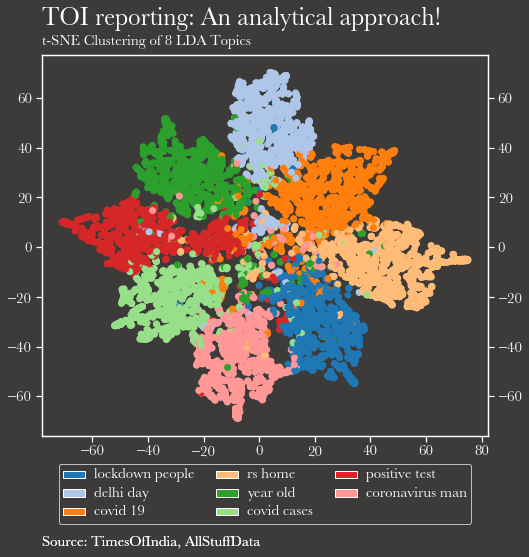

In [336]:
footnote_params = {
    'xy': (0,-0.20),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}
fig, ax = plt.subplots(figsize=(8,7))
top_3_words_lda = get_top_n_words(2, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)
scatter = ax.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1],color=colormap[lda_keys])


# for i in range(n_topics):
#     ax.text(lsa_mean_topic_vectors[i][0], lsa_mean_topic_vectors[i][1],top_3_words_lsa[i], fontdict={'fontsize':20,'fontweight':'bold','fontname':'Baskerville'}) 

recs = []
for i in range(0,len(colormap.tolist())):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colormap[i]))

ax.set_title('TOI reporting: An analytical approach!',loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )

fig.text(0.125,0.9,"t-SNE Clustering of 8 LDA Topics",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
mpl.rcParams['savefig.facecolor'] = (61.0/255, 58.5/255, 57.0/255)
ax.set_facecolor((61.0/255, 58.5/255, 57.0/255))
fig.patch.set_facecolor((61.0/255, 58.5/255, 57.0/255))
ax.legend(recs,top_3_words_lda,**LEGEND_KWARGS,**legend_placement_kwargs,facecolor =(61.0/255, 58.5/255, 57.0/255))
footnote_text = "Source: TimesOfIndia, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname(os.getcwd())+'/todays_chart/new_07.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [ ]:
from textblob import TextBlob
text = "Allergy cases on the rise in Bengaluru" 

In [ ]:
blob = TextBlob(text)

In [ ]:
blob.tags

In [ ]:
# iterate through the csv file 
for i,row in df.iterrows(): 
      
    # typecaste each val to string 
    val = str(df.loc[i,'headline']) 
  
    # split the value 
    tokens = val.split() 
    

      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    df.loc[i,'tokens'] = str(tokens)
    
    comment_words += " ".join(tokens)+" "


In [ ]:
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 